In [152]:
import pandas as pd
import numpy as np


In [153]:
data=pd.read_csv('SNA.csv')

In [154]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [156]:
data['Gender'].replace(to_replace=['Male','Female'],value=[0,1],inplace=True)

C:\Users\seasp\AppData\Local\Temp\ipykernel_29972\4111023445.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gender'].replace(to_replace=['Male','Female'],value=[0,1],inplace=True)
C:\Users\seasp\AppData\Local\Temp\ipykernel_29972\4111023445.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [157]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [162]:
from sklearn.preprocessing import StandardScaler

In [164]:
from sklearn.naive_bayes import GaussianNB

In [165]:
nb=GaussianNB()

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X=data[['Gender',	'Age',	'EstimatedSalary']]
Y=data['Purchased']

In [169]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [170]:
nb.fit(X_train,Y_train)

GaussianNB()

In [171]:
predictions=nb.predict(X_test)

In [172]:
import seaborn as sns

<Axes: xlabel='EstimatedSalary'>

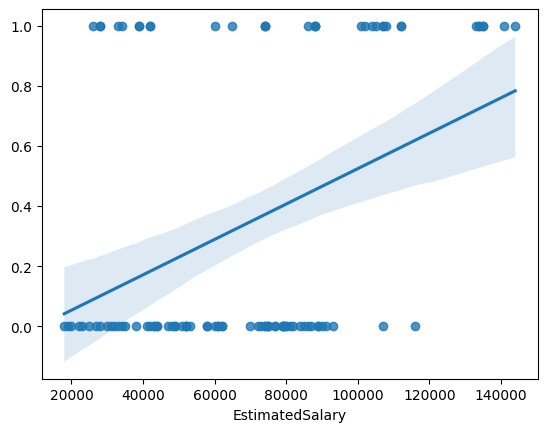

In [174]:
sns.regplot(x=X_test['EstimatedSalary'],y=predictions)

In [180]:
from sklearn.metrics import confusion_matrix

In [182]:
cm=confusion_matrix(Y_test,predictions)

In [183]:
print(cm)

[[59  4]
 [ 7 30]]


In [185]:
from sklearn.metrics import classification_report

In [186]:
cr=classification_report(Y_test,predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.88      0.81      0.85        37

    accuracy                           0.89       100
   macro avg       0.89      0.87      0.88       100
weighted avg       0.89      0.89      0.89       100

